## 머신러닝
# 5. SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 유방암 데이터
- 샘플수 569, 속성수 30
- 악성(malignant, 0) 과 양성(benign, 1) 분류

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
dir(cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
cancer.data.shape

(569, 30)

In [6]:
print(*cancer.feature_names, sep='/')

mean radius/mean texture/mean perimeter/mean area/mean smoothness/mean compactness/mean concavity/mean concave points/mean symmetry/mean fractal dimension/radius error/texture error/perimeter error/area error/smoothness error/compactness error/concavity error/concave points error/symmetry error/fractal dimension error/worst radius/worst texture/worst perimeter/worst area/worst smoothness/worst compactness/worst concavity/worst concave points/worst symmetry/worst fractal dimension


In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

- 히스토그램 그리기

In [10]:
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

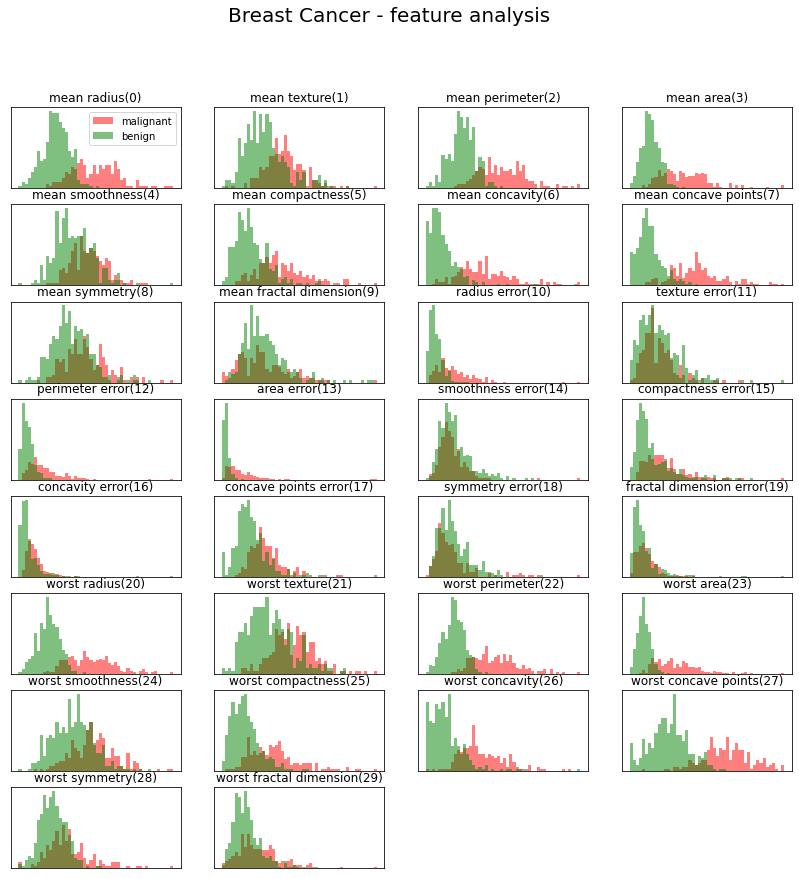

In [11]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()

- 첫번째 속성과 나머지 속성들 간의 산점도

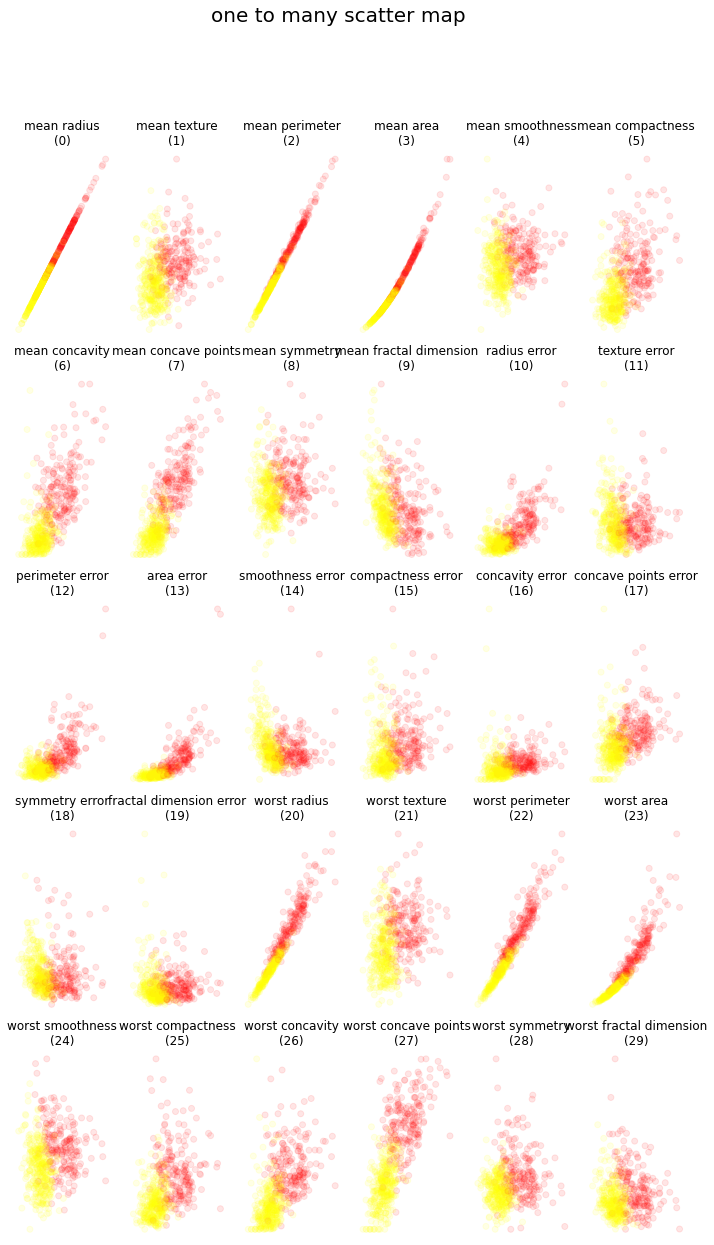

In [12]:
fig,axes = plt.subplots(5,6,figsize=[12,20])
fig.suptitle('one to many scatter map', fontsize=20)

for i in range(30):
    ax=axes.ravel()[i]
    ax.scatter(cancer.data[:,0],cancer.data[:,i], c=cancer.target, cmap='autumn', alpha=0.1)
    ax.set_title(cancer.feature_names[i]+('\n(%d)' % i))
    ax.set_axis_off()

### 정규화가 필요함

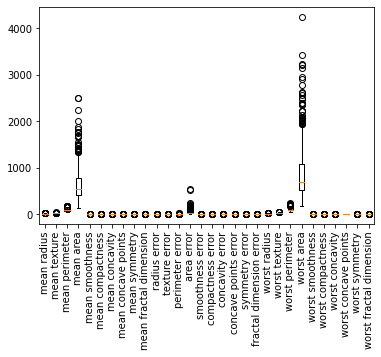

In [14]:
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
pass

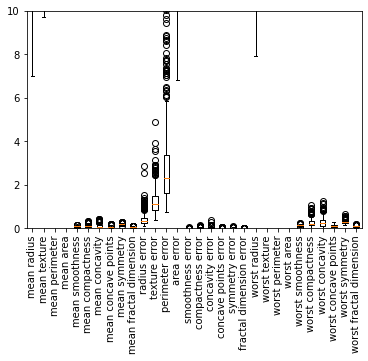

In [15]:
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.ylim(0,10)
pass

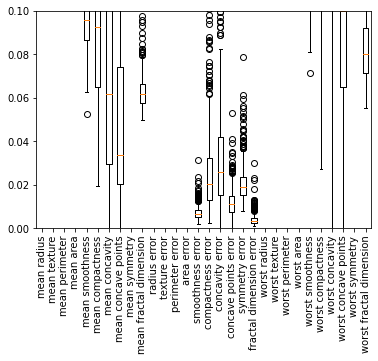

In [21]:
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.ylim(0,0.1)
pass

In [24]:
cancer.data.mean(axis=0)

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [27]:
X = (cancer.data - cancer.data.mean(axis=0))/cancer.data.std(axis=0)
X.mean(axis=0).round(3)

array([-0., -0., -0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0.,
       -0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0.,
        0., -0., -0.,  0.])

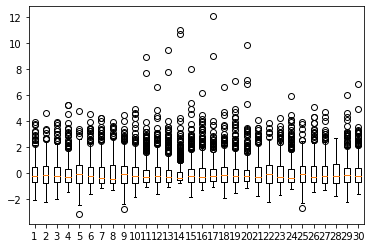

In [30]:
plt.boxplot(X); pass

In [33]:
v_min = cancer.data.mean(axis=0)
v_max = cancer.data.max(axis=0)
X = (cancer.data - v_min)/(v_max - v_min)

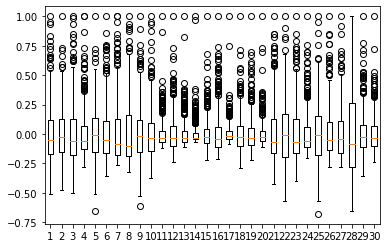

In [34]:
plt.boxplot(X); pass

### SVM 적용

In [36]:
X = cancer.data
y = cancer.target

X.shape, y.shape

((569, 30), (569,))

In [38]:
X = (X - X.mean(axis=0))/X.std(axis=0)
X.mean(axis=0).round(3)

array([-0., -0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0.])

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.958041958041958

### SVM 의 중요한 옵션 두가지
- C : 값이 클수록 경계선을 세밀하게 만든다
- gamma : 값이 클수록 커널 기법에 나오는 RBF 종모양 곡선을 빼족하게 만든다
- C 와 gamma 모두 값이 클수록 과대적합(overfitting) 되는 경향을 보인다

In [46]:
s_train = []
s_test = []
rng = np.array([0.01, 0.1, 1, 10, 100, 1000])

for C in rng:
    model = SVC(C=C)
    model.fit(X_train, y_train)
    s_train.append(model.score(X_train, y_train))
    s_test.append(model.score(X_test, y_test))
    print(C, s_train[-1], s_test[-1])

0.01 0.6244131455399061 0.6363636363636364
0.1 0.960093896713615 0.9370629370629371
1.0 0.9882629107981221 0.958041958041958
10.0 0.9953051643192489 0.972027972027972
100.0 1.0 0.965034965034965
1000.0 1.0 0.965034965034965


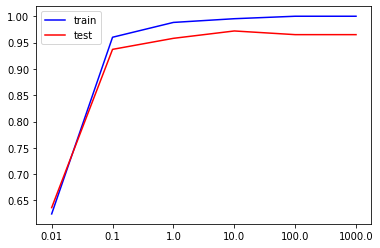

In [47]:
plt.plot(s_train, 'b-')
plt.plot(s_test, 'r-')
plt.xticks(range(len(rng)), [str(n) for n in rng])
plt.legend(['train', 'test'])
pass

In [51]:
s_train = []
s_test = []
rng = np.array([0.001, 0.01, 0.1, 1, 10])

for gamma in rng:
    model = SVC(C= 10, gamma=gamma)
    model.fit(X_train, y_train)
    s_train.append(model.score(X_train, y_train))
    s_test.append(model.score(X_test, y_test))
    print(gamma, s_train[-1], s_test[-1])

0.001 0.9859154929577465 0.965034965034965
0.01 0.9882629107981221 0.972027972027972
0.1 1.0 0.965034965034965
1.0 1.0 0.6363636363636364
10.0 1.0 0.6363636363636364


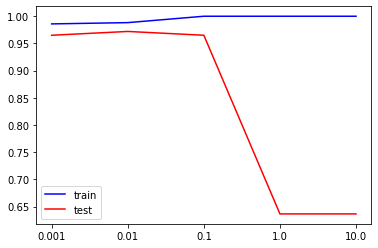

In [52]:
plt.plot(s_train, 'b-')
plt.plot(s_test, 'r-')
plt.xticks(range(len(rng)), [str(n) for n in rng])
plt.legend(['train', 'test'])
pass

### 시각화를 위해 속성을 2개로 제한
- 위의 산점도를 보고 어떤 속성을 고르면 좋을지 생각해 보자

In [54]:
X = cancer.data[:, [0,1]] # 속성0 과 속성1
y = cancer.target

X.shape, y.shape

((569, 2), (569,))

In [55]:
### 정규화
X = (X-X.mean(axis=0))/X.std(axis=0)

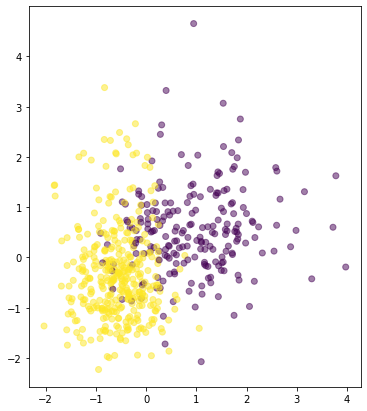

In [60]:
plt.figure(figsize=[7,7])
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.axis('scaled')
pass

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 2), (143, 2), (426,), (143,))

In [72]:
model = SVC(probability=True) # 확률값을 추가적으로 제공
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9090909090909091

In [73]:
model.score(X_train, y_train)

0.9107981220657277

In [74]:
model.support_vectors_

array([[ 0.01781004,  1.05191614],
       [-0.07591465, -0.54910605],
       [-0.36844927,  0.7075102 ],
       [ 0.37850807,  0.04429607],
       [-0.27188444, -0.14652343],
       [ 0.21093969, -0.60960979],
       [-0.09011536,  1.03795373],
       [ 3.97128765, -0.19073771],
       [-0.24064288,  0.23046144],
       [-0.1469182 ,  1.25669804],
       [ 1.87526288,  2.75300221],
       [ 0.94653646,  4.65188898],
       [ 0.28194324, -0.60728273],
       [ 0.04053117,  0.75870568],
       [-0.50761623,  1.76167161],
       [ 0.27058267,  1.50104009],
       [ 0.18537841,  1.08216801],
       [ 1.43788102, -0.77948569],
       [-0.86547411, -0.10696329],
       [ 0.10017415,  0.50505536],
       [ 0.39838906,  3.32080658],
       [ 0.85565191, -0.6724406 ],
       [ 0.56311729, -0.28847453],
       [-0.04751323, -0.52118124],
       [ 0.56879758, -0.32803467],
       [-0.27188444,  0.58650271],
       [-0.0929555 , -0.8143917 ],
       [ 0.44667147,  0.23744264],
       [-0.90239596,

In [75]:
model.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [76]:
model.predict_proba(X_test).round(2)

array([[0.13, 0.87],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.07, 0.93],
       [0.28, 0.72],
       [0.99, 0.01],
       [0.06, 0.94],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.1 , 0.9 ],
       [0.11, 0.89],
       [0.06, 0.94],
       [0.67, 0.33],
       [0.42, 0.58],
       [0.33, 0.67],
       [0.32, 0.68],
       [1.  , 0.  ],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.02, 0.98],
       [0.91, 0.09],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.41, 0.59],
       [0.37, 0.63],
       [0.99, 0.01],
       [0.1 , 0.9 ],
       [0.08, 0.92],
       [0.07, 0.93],
       [0.09, 0.91],
       [0.09, 0.91],
       [0.14, 0.86],
       [0.94, 0.06],
       [0.03, 0.97],
       [0.06, 0.94],
       [0.84, 0.16],
       [0.93, 0.07],
       [0.07, 0.93],
       [0.92, 0.08],
       [0.07, 0.93],
       [0.11, 0.89],
       [0.1 , 0.9 ],
       [0.07, 0.93],
       [0.06, 0.94],
       [0.88, 0.12],
       [0.95, 0.05],
       [0.07, 0.93],
       [0.98,

Text(0.5, 1.0, 'SVM - decision bounds')

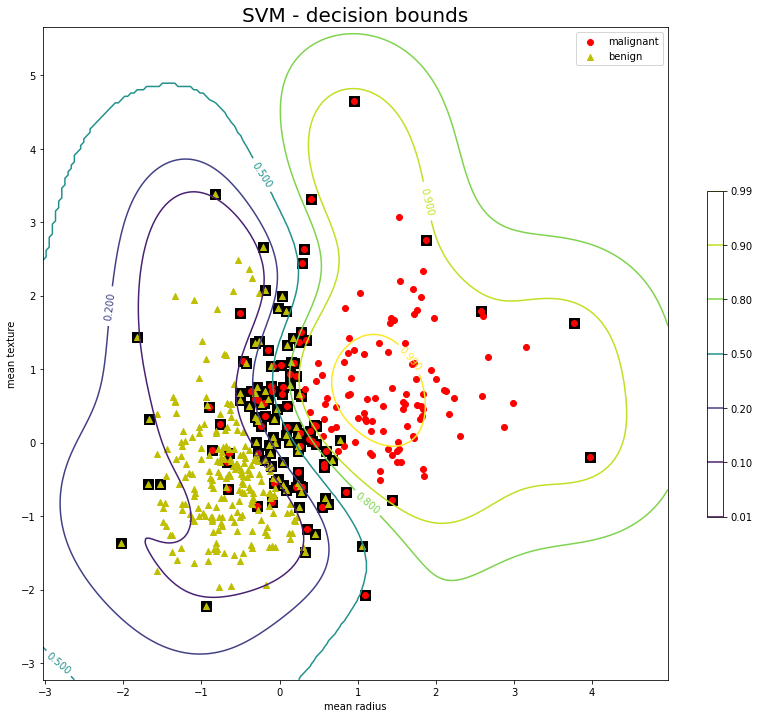

In [77]:
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0] # 등고선을 위해 확률점수를 구함

sv=model.support_vectors_

fig=plt.figure(figsize=[14,12])

# show probability countour
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=[0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])
plt.clabel(CS, inline=2, fontsize=10)

# show support vectors
plt.scatter(sv[:,0], sv[:,1], marker='s', c= 'k', s=100)

# show train samples
plt.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0],marker='o',c='r',label='malignant')
plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1],marker='^',c='y',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('SVM - decision bounds',fontsize=20)

Text(0.5, 1.0, 'SVM - decision bounds')

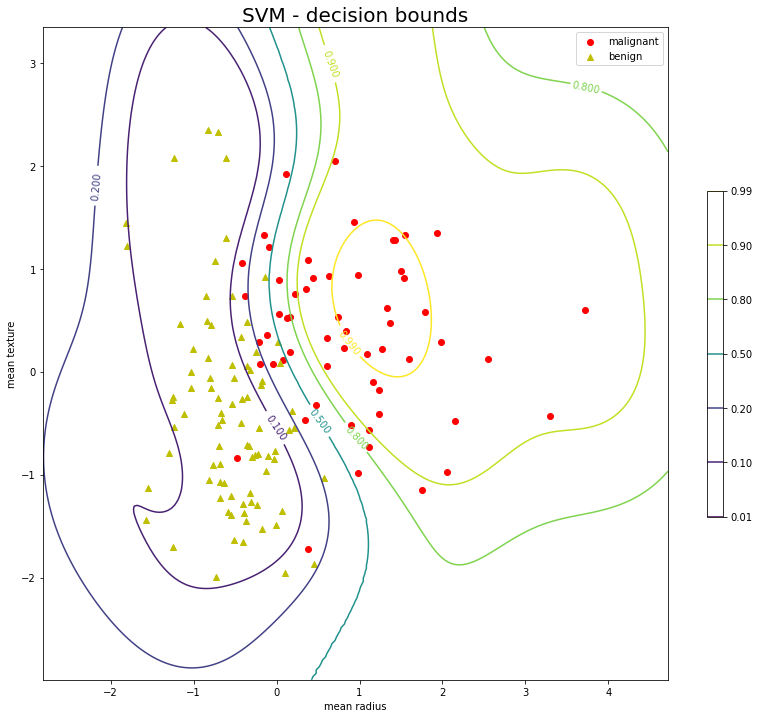

In [80]:
xmax = X_test[:,0].max()+1
xmin = X_test[:,0].min()-1
ymax = X_test[:,1].max()+1
ymin = X_test[:,1].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0] # 등고선을 위해 확률점수를 구함

sv=model.support_vectors_

fig=plt.figure(figsize=[14,12])

# show probability countour
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=[0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])
plt.clabel(CS, inline=2, fontsize=10)

# show support vectors
#plt.scatter(sv[:,0], sv[:,1], marker='s', c= 'k', s=100)

# show train samples
plt.scatter(X_test[:,0][y_test==0],X_test[:,1][y_test==0],marker='o',c='r',label='malignant')
plt.scatter(X_test[:,0][y_test==1],X_test[:,1][y_test==1],marker='^',c='y',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('SVM - decision bounds',fontsize=20)